In [1]:
import pymc3 as pm 
import matplotlib.pyplot as plt
import numpy as np 
import theano
import theano.tensor as tt
from scipy import stats
import pymc3 as pm 
from ipynb.fs.full.simul_data import *
from ipynb.fs.full.counterfactual_generate import *
trans_dim = 7
u_dim = 3
N=100
mu_u = np.zeros(u_dim)
cov_u = np.eye(u_dim)
mu_t = np.zeros(trans_dim)
cov_trans = np.eye(trans_dim)

trans_data = np.random.randn(N,trans_dim)





In [3]:
with pm.Model() as model:
    
    
    u = pm.MvNormal('u',mu=mu_u,cov=cov_u,shape=u_dim)
    param = pm.MatrixNormal('param', colcov=cov_u,
                       rowcov=cov_trans, shape=(trans_dim, u_dim))
    trans0 = pm.MvNormal('trans0',mu=mu_t,cov=cov_trans,shape=trans_dim)
    mu_trans = tt.dot(param,u)+trans0
    trans = pm.MvNormal('trans',mu=mu_trans,cov=cov_trans,observed=trans_data)
    trace=pm.sample()
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [trans0, param, u]
Sampling 2 chains: 100%|██████████| 2000/2000 [02:18<00:00,  8.77draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c228a1470>,
      dtype=object)

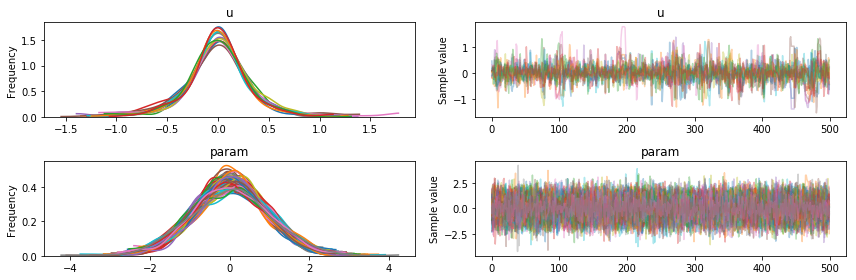

In [3]:
pm.traceplot(trace)